<a href="https://colab.research.google.com/github/dariaAlium/iad/blob/master/Lab_3_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn import preprocessing 
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [244]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [7]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


In [219]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [245]:
A = data.isnull()
print('Missing values by features:', A.sum(), sep='\n')
print('Missing values :', A.sum().sum(),)
'''
таким образом видим, что колонка списовальщиков заполнена меньше всего. удалим ее.
'''
data.drop(['cheating'], axis='columns', inplace=True)

Missing values by features:
ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64
Missing values : 740


In [246]:
'''
спойлер из прошлой работы: алкоголь по выходным и алкоголь в будни сильно кореллируют
и нет строк,  там где прощенно и то и то 
поэтому поставим вместо значения компаньена
'''
data.loc[(data['Dalc'].isnull()) & (data['Walc'].isnull())]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [0]:
data['Dalc'] = data['Dalc'].fillna(data['Walc'])
data['Walc'] = data['Walc'].fillna(data['Dalc'])

In [248]:
'''
спойлер: романтические отношения не сильно влиют на оценку за семестр, поставим 
там 0, а вот отношения
в семье напротив, поэтому если ребенок употребялет по выходным больше 1.0, 
то ставим отношения 1.0 а если 1.0 то наоборот поставим 3.0 (если бы отношения были
прекрасные, то не было бы нужды ставить nan, согласитесь!)
'''
data['romantic'] = data['romantic'].fillna('no')
data.loc[(data['famrel'].isnull())]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
85,164833,Por,GP,F,16,U,GT3,T,2,2,services,other,reputation,mother,2,2,0,no,no,no,yes,no,yes,yes,no,NaN,4,4,1.0,4.0,5,0,13,12,14
116,189712,Math,GP,M,16,U,LE3,A,3,4,services,other,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,NaN,3,3,1.0,1.0,5,4,11,11,11
146,212614,Math,GP,F,19,U,LE3,T,1,1,at_home,other,reputation,other,1,2,1,yes,yes,no,yes,no,yes,yes,no,NaN,4,3,1.0,3.0,3,18,12,10,10
159,224690,Por,GP,M,17,U,LE3,T,2,3,services,services,reputation,father,1,2,0,no,yes,no,no,no,yes,yes,no,NaN,3,3,1.0,3.0,3,0,10,11,11
398,434990,Por,GP,M,16,U,GT3,T,4,4,health,other,course,mother,1,1,0,no,yes,no,yes,yes,yes,yes,no,NaN,4,4,1.0,4.0,5,4,12,13,13
434,469435,Math,MS,M,19,R,GT3,T,1,1,other,other,home,other,3,1,1,no,yes,no,no,yes,yes,yes,no,NaN,4,4,3.0,3.0,5,4,8,8,8
455,486246,Por,GP,F,15,U,GT3,T,4,4,services,teacher,other,father,1,2,0,yes,yes,no,yes,no,yes,yes,no,NaN,4,4,1.0,1.0,3,2,13,12,12
478,504919,Por,GP,F,19,U,LE3,A,2,3,at_home,other,home,other,2,1,1,no,no,no,no,yes,no,yes,no,NaN,2,3,3.0,4.0,5,16,10,11,11
602,624719,Por,GP,M,18,R,LE3,T,3,2,services,other,reputation,mother,2,3,0,no,yes,no,yes,yes,yes,yes,no,NaN,4,2,1.0,1.0,4,0,14,15,15
820,807503,Math,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,NaN,4,1,1.0,1.0,1,0,13,14,15


In [249]:
'''
можно вернуться на код с проверкой нулевых значений и посмотреть что пропущенных значений нет
а можно поверить мне на слово
'''
data['famrel'].loc[(data['Walc'] > 1)] = data['famrel'].loc[(data['Walc'] > 1)].fillna(3.0)
data['famrel'].loc[(data['Walc'] == 1)] = data['famrel'].loc[(data['Walc'] == 1)].fillna(3.0)
data.loc[(data['famrel'].isnull())]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [250]:
'''
я буду руками изменять значения категориальных признаков на числовые, чтобы потом
знать какая цифра что обозначает 
Также, я ставила наибольшую цифру таму параметру, который вероятно имеют ученики 
с наибольшим баллом
'''
list_of_names = {'Subject': {'Por': 1, 'Math': 0}, 'school': {'GP': 1, 'MS':0},
                 'sex': {'F': 1, 'M': 0, 'm': 0}, 'address': {'U': 1, 'R': 0}, 'famsize': 
                 {'GT3': 0, 'LE3': 1}, 'Pstatus': {'A': 0, 'T': 1, 't': 1}, 'Mjob': 
                 {'services': 2, 'other': 0, 'health': 1, 'at_home': 3, 'teacher': 4, 'at-home':3}, 
                 'Fjob': {'services': 2, 'other': 0, 'health': 1, 'at_home': 3, 'at-home':3,
                          'teacher': 4}, 'reason': {'course': 2, 'home': 0, 'reputation': 1, 'other': 0},
                 'guardian': {'father': 1, 'mother': 2, 'other':0, 'futher': 1}, 'schoolsup': 
                 {'no': 0, 'yes': 1}, 'famsup': {'no': 0, 'yes': 1}, 'paid':
                 {'no': 1, 'yes': 0}, 'activities': {'no': 0, 'yes': 1}, 'nursery':
                 {'no': 0, 'yes': 1}, 'higher': {'no': 0, 'yes': 1}, 'internet':
                 {'no': 0, 'yes': 1}, 'romantic': {'no': 1, 'yes': 0}, 'Medu': {
                  '0':0,'1':1, '2':2, '3':3, '4':4, 'o': 0}, 'Fedu': { '0':1,'1':1, '2':2, '3':3, '4':4, 'o': 0}
                 }
for i in data.columns.tolist():
  if i in list_of_names:
    data[i] = data[i].map(list_of_names[i])
data

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,1,1,1,16,1,0,0,3,4,2,0,2,1,1,1,0,0,0,1,0,1,1,1,1,3.0,2,1,1.0,4.0,5,12,15,13,14
1,101021,1,1,1,17,1,0,1,3,2,0,0,2,2,1,2,0,0,0,1,1,0,1,1,1,5.0,3,4,1.0,3.0,3,2,17,18,17
2,102965,1,1,0,16,1,1,1,1,2,1,2,2,2,2,1,2,0,0,1,0,0,1,1,1,4.0,4,5,3.0,5.0,5,0,9,8,10
3,102989,1,0,0,17,1,0,1,2,3,0,2,0,1,2,2,0,0,0,1,1,1,1,1,1,4.0,4,3,1.0,1.0,3,4,14,15,16
4,103131,1,1,1,16,1,0,1,1,1,3,0,0,2,2,1,0,0,1,1,0,1,1,0,1,4.0,3,2,1.0,4.0,5,2,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,0,1,1,15,0,0,1,3,3,2,2,1,0,2,3,2,0,1,0,1,1,1,1,0,4.0,2,1,2.0,3.0,3,8,10,10,10
1040,997897,1,1,0,15,0,0,1,2,1,1,2,1,2,1,2,0,0,0,1,1,1,1,1,0,5.0,4,2,1.0,1.0,5,4,10,9,10
1041,998425,1,0,1,16,0,1,1,1,1,3,0,2,1,3,2,0,0,1,1,0,1,1,0,1,5.0,3,2,1.0,1.0,1,0,16,17,18
1042,999143,1,1,0,16,1,0,1,2,1,3,0,2,2,4,1,0,0,0,1,0,1,1,0,1,3.0,2,1,1.0,1.0,2,4,9,9,11


Subject
school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


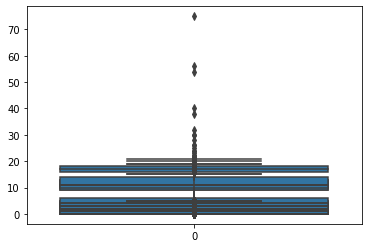

In [264]:
'''
тут я поняла что в образовании матери и отца есть клетка с о 
'''
for i in data.columns.tolist():
  print(i)
  sns.boxplot(data=data[i])
  #plt.show()

In [0]:
'''
из интересных фактов, которые мы узнали по ящикам с усами: 
в школе учится студет которому 22, но это скорее второгодник, 
чем вброс данных
надо дропнуть айди
'''
data.drop(['ID'], axis='columns', inplace=True)

In [268]:
'''
сделаем нормализацию данных
тут я поняла что в некоторых других столбцах есть некоректные данные
так же объединим алкоголь в один столбец
и создадим столбец благополучия в семье  
так же оставим бинарным признакам их бинарность
'''
def leave_bin(frame, norm):
  for seria in frame.columns.tolist():
    if (frame[seria].max() == 1) & (frame[seria].min() == 0):
      norm[seria] = frame[seria]

data_norm = pd.DataFrame(preprocessing.normalize(data), columns=list(data.columns))
data_norm['Alco'] = data_norm['Dalc'] + data_norm['Walc']
data_norm['WF'] = data_norm['famsize'] + data_norm['Pstatus'] + data_norm['Medu'] + data_norm['Fedu']+ data_norm['guardian']+data_norm['famsup'] +data_norm['paid']+ data_norm['internet']
data_norm.drop(['Dalc'], axis='columns', inplace=True)
data_norm.drop(['Walc'], axis='columns', inplace=True)
data_norm.drop(['G2'], axis='columns', inplace=True)
data_norm['is anybody home'] = np.where((data['Mjob'] == 3)|(data['Fjob'] == 3),1,0)
leave_bin(data, data_norm)

data_norm 

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3,Alco,WF,is anybody home
0,1,1,1,0.484404,1,0,0,0.090826,0.121101,0.060550,0.000000,0.060550,0.030275,0.030275,0.030275,0.000000,0,0,1,0,1,1,1,1,0.090826,0.060550,0.030275,0.151376,0.363303,0.454129,0.423853,0.151376,0.302752,0
1,1,1,1,0.471495,1,0,1,0.083205,0.055470,0.000000,0.000000,0.055470,0.055470,0.027735,0.055470,0.000000,0,0,1,1,0,1,1,1,0.138675,0.083205,0.110940,0.083205,0.055470,0.471495,0.471495,0.110940,0.277350,0
2,1,1,0,0.626128,1,1,1,0.039133,0.078266,0.039133,0.078266,0.078266,0.078266,0.078266,0.039133,0.078266,0,0,1,0,0,1,1,1,0.156532,0.156532,0.195665,0.195665,0.000000,0.352197,0.391330,0.313064,0.352197,0
3,1,0,0,0.519948,1,0,1,0.061170,0.091756,0.000000,0.061170,0.000000,0.030585,0.061170,0.061170,0.000000,0,0,1,1,1,1,1,1,0.122341,0.122341,0.091756,0.091756,0.122341,0.428193,0.489363,0.061170,0.275267,0
4,1,1,1,0.551069,1,0,1,0.034442,0.034442,0.103325,0.000000,0.000000,0.068884,0.068884,0.034442,0.000000,0,1,1,0,1,1,0,1,0.137767,0.103325,0.068884,0.172209,0.068884,0.413302,0.447744,0.172209,0.241093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,1,0.573539,0,0,1,0.114708,0.114708,0.076472,0.076472,0.038236,0.000000,0.076472,0.114708,0.076472,0,1,0,1,1,1,1,0,0.152944,0.076472,0.038236,0.114708,0.305888,0.382360,0.382360,0.191180,0.344124,0
1040,1,1,0,0.601445,0,0,1,0.080193,0.040096,0.040096,0.080193,0.040096,0.080193,0.040096,0.080193,0.000000,0,0,1,1,1,1,1,0,0.200482,0.160385,0.080193,0.200482,0.160385,0.400963,0.400963,0.080193,0.320771,0
1041,1,0,1,0.461112,0,1,1,0.028820,0.028820,0.086459,0.000000,0.057639,0.028820,0.086459,0.057639,0.000000,0,1,1,0,1,1,0,1,0.144098,0.086459,0.057639,0.028820,0.000000,0.461112,0.518751,0.057639,0.201737,1
1042,1,1,0,0.641542,1,0,1,0.080193,0.040096,0.120289,0.000000,0.080193,0.080193,0.160385,0.040096,0.000000,0,0,1,0,1,1,0,1,0.120289,0.080193,0.040096,0.080193,0.160385,0.360867,0.441060,0.080193,0.280674,1


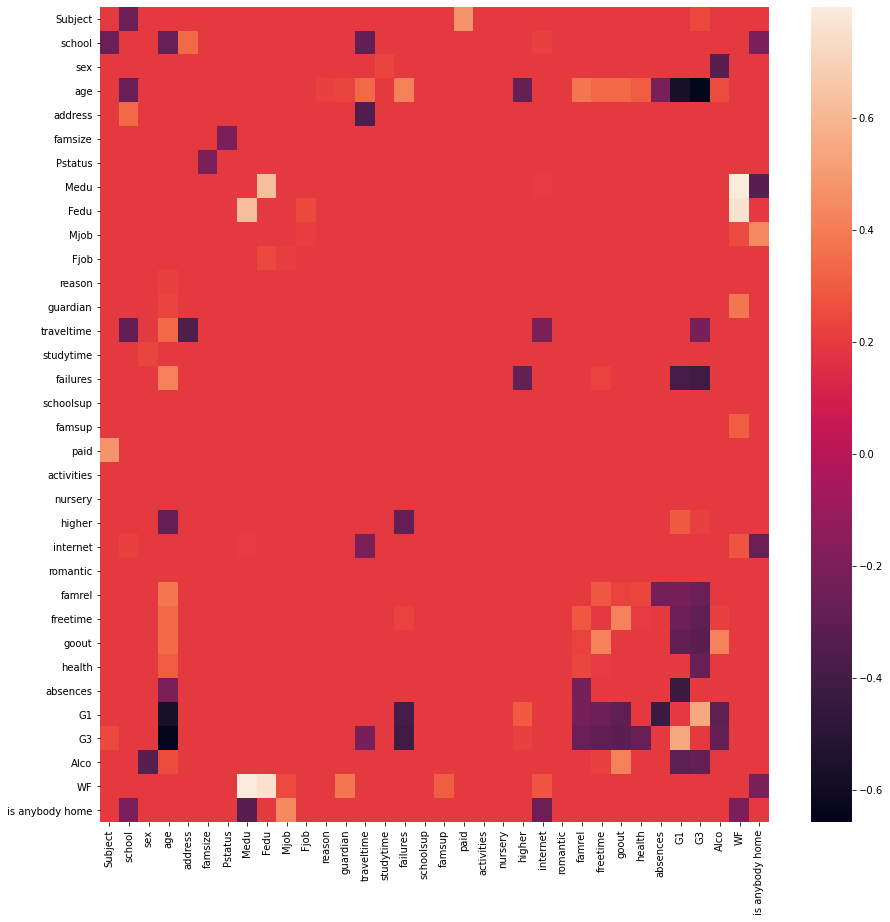

In [269]:
'''
теперь посмотрим корреляцию наших данных
'''
corr = data_norm.corr() 
fig, ax = plt.subplots(figsize=(15,15))    
'''
заменим малозначащие данные и данные между одинаковыми столбцами на один 
цвет, чтобы яркие зависимости были хорошо видны
'''
for i in corr.columns.tolist():
  for j in corr.columns.tolist():
    if (-0.2 < corr[i][j] < 0.2) | (corr[i][j] == 1):
      corr[i][j] = 0.2
sns.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [270]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data_norm.drop('G3', axis=1),
                                            data['G3'],
                                            test_size=0.3, 
                                            random_state=5)
trainData

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,Alco,WF,is anybody home
842,1,1,1,0.693481,1,1,1,0.132092,0.132092,0.000000,0.000000,0.033023,0.000000,0.033023,0.099069,0.066046,0,0,0,1,1,1,1,1,0.099069,0.099069,0.066046,0.165115,0.000000,0.297206,0.066046,0.363252,0
179,0,1,0,0.612223,1,0,1,0.076528,0.076528,0.000000,0.000000,0.076528,0.038264,0.038264,0.076528,0.000000,0,0,1,0,1,0,1,1,0.153056,0.114792,0.191320,0.153056,0.153056,0.382639,0.229584,0.306111,0
880,1,1,1,0.500580,1,1,0,0.055620,0.055620,0.055620,0.000000,0.027810,0.055620,0.055620,0.055620,0.000000,0,1,1,0,1,1,1,1,0.111240,0.027810,0.111240,0.111240,0.278100,0.389340,0.111240,0.278100,0
42,1,0,0,0.610257,0,0,1,0.033903,0.000000,0.101710,0.101710,0.067806,0.000000,0.101710,0.033903,0.033903,1,1,1,0,1,1,0,1,0.135613,0.101710,0.067806,0.135613,0.000000,0.406838,0.067806,0.135613,1
540,1,1,1,0.543036,1,0,1,0.036202,0.036202,0.000000,0.000000,0.000000,0.036202,0.036202,0.072405,0.000000,0,1,1,1,0,1,1,1,0.144810,0.108607,0.072405,0.144810,0.072405,0.470632,0.181012,0.253417,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1,1,1,0.531858,1,1,1,0.066482,0.066482,0.000000,0.099723,0.066482,0.033241,0.066482,0.066482,0.033241,1,0,1,1,1,1,1,1,0.132964,0.099723,0.099723,0.166206,0.465376,0.332411,0.132964,0.299170,1
73,0,1,1,0.517477,1,0,1,0.097027,0.064685,0.000000,0.000000,0.032342,0.064685,0.032342,0.064685,0.000000,0,1,0,0,1,1,1,1,0.032342,0.064685,0.064685,0.032342,0.452792,0.388108,0.097027,0.323423,0
998,0,0,1,0.466628,0,1,1,0.103695,0.103695,0.000000,0.000000,0.025924,0.051848,0.051848,0.077771,0.000000,0,0,1,0,1,1,1,1,0.129619,0.103695,0.103695,0.025924,0.000000,0.492552,0.051848,0.362933,0
206,0,1,1,0.780013,1,0,1,0.045883,0.045883,0.137649,0.000000,0.091766,0.045883,0.045883,0.091766,0.000000,0,1,1,0,0,1,1,1,0.229416,0.137649,0.137649,0.137649,0.183533,0.229416,0.091766,0.321182,1


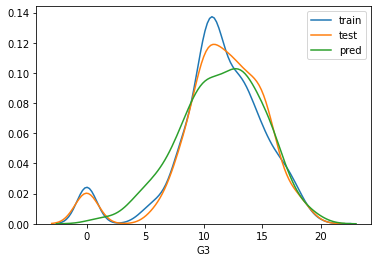

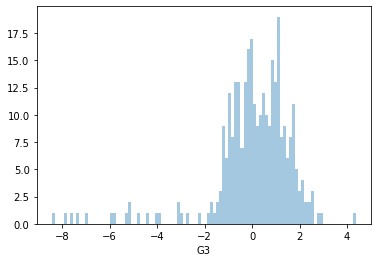

MSE:   2.886433304809208
RMSE:  1.6989506481381995
R2:    0.800292779065171
MAE:   1.1368485200126373
MedAE: 0.8556422019535148
MSE:   2.6269554859207154
RMSE:  1.6207885383111258
R2:    0.8260763620985181
MAE:   1.082058041188846
MedAE: 0.7706091269903244
CPU times: user 728 ms, sys: 110 ms, total: 838 ms
Wall time: 712 ms


In [277]:
%%time
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(true, pred)

    medae = metrics.median_absolute_error(true, pred)

    R2 = metrics.r2_score(true, pred)

    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))
regressionModel = linear_model.LinearRegression()
regressionModel.fit(trainData, trainDependentVariables)
predictedDependentVariables = regressionModel.predict(testData)
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()
error = testDependentVariables - predictedDependentVariables
sns.distplot(error, bins=100, kde=False)
plt.show()
calc_metrics(testDependentVariables, predictedDependentVariables)
calc_metrics(trainDependentVariables, regressionModel.predict(trainData))

## Часть 3. Классификация

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


### Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.